In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importando as métricas
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

#importando a matriz de confusão
from sklearn.metrics import plot_confusion_matrix

#importando a Curva ROC e AOC
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
data = pd.read_csv('bank-full.csv')

### Análise Exploratória

In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Descrição dos atributos:
 Age- Age of customer 

 Job- Job of customer 

 Martial- Martial status of customer 

 Education- Customer education level 

 Default- Has credit in default? 

 Housing- If costumer has housing loan 

 Loan- Has Personal Loan 

 Balance- Customer's individual balance 

 Contact- Communication type 

 Month- Last contact month of year 

 Day- Last contact day of the week 

 Duration- Last contact duration, in seconds
 
 Campaign- Number of contacts performed during this campaign and for this client 
 
 Pdays- Number of days that passed by after the client was last contacted from a previous campaign 
 
 Previous- Number of contacts performed before this campaign and for this client 
 
 Poutcome- outcome of the previous marketing campaign 
 
 Y- has the client subscribed a term deposit

In [5]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


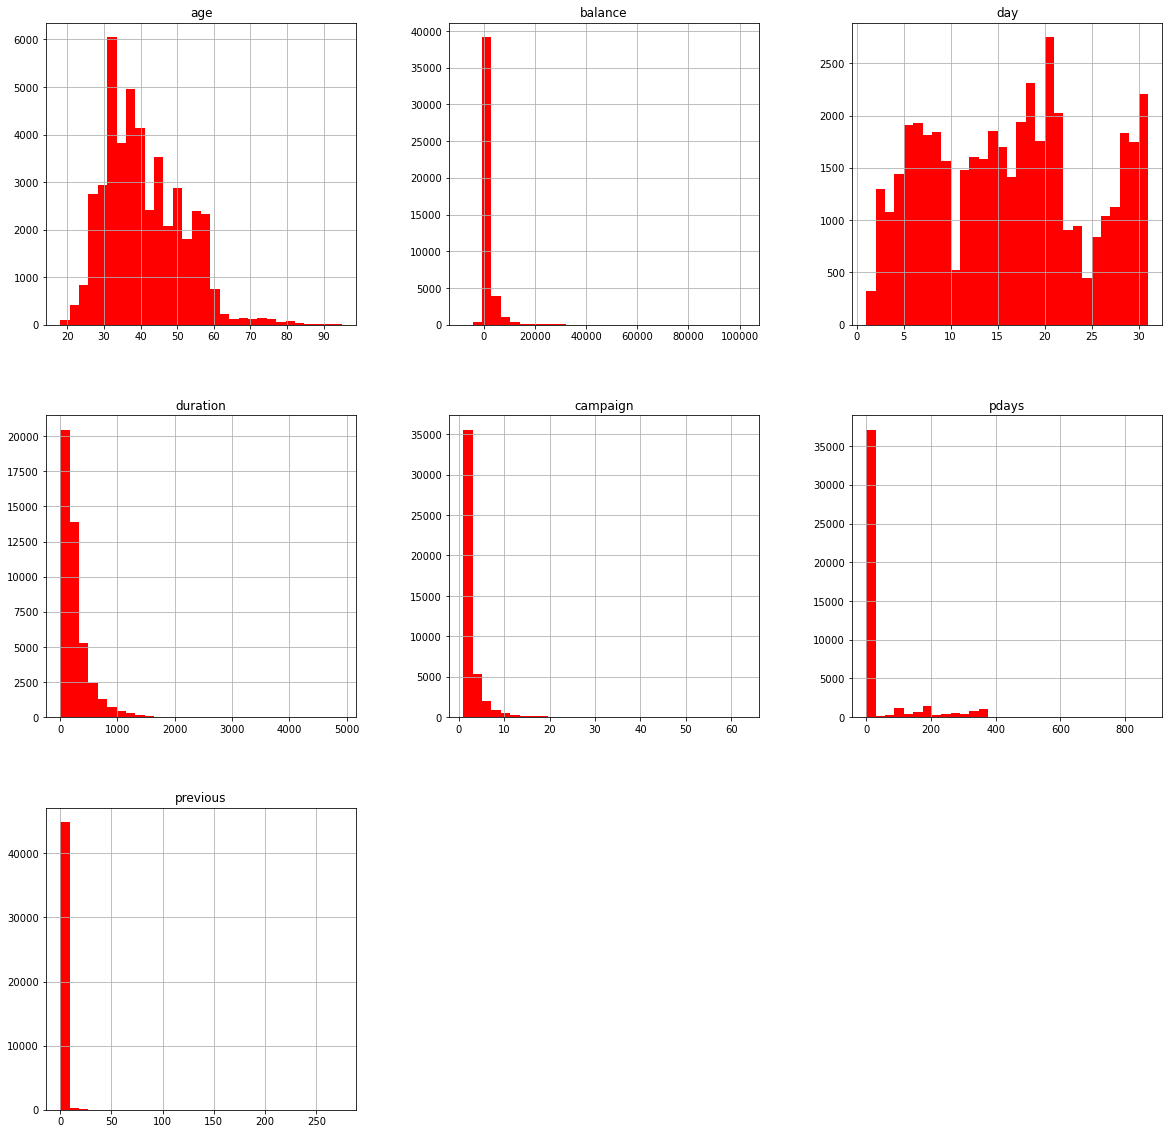

In [6]:
data.hist(bins = 30, figsize=(20,20), color = 'r');

In [7]:
data[data['previous'] > 50].y.value_counts()

no     2
yes    2
Name: y, dtype: int64

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [9]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [10]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

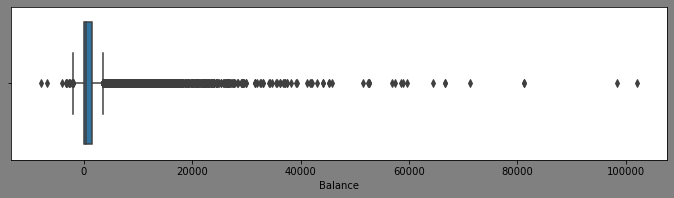

In [11]:
# boxplot das features numericas para encontrar outlier

plt.figure(figsize=(40,40), facecolor='gray')
plotnumber =1
ax = plt.subplot(12,3,plotnumber)
sns.boxplot(data['balance'])
plt.xlabel('Balance')
plt.show()

In [12]:
#Criando faixas saldo dos clientes para facilitar a vizualização.

bins_balance = [-10000, -5000, 0, 5000, 10000, 20000, 50000, 110000] 
group_labels = ['divida alta', 'divida baixa', 'zero', 'saldo', 'saldo bom', 'saldo otimo', 'saldo elevado']

balance_categorizado = pd.cut(data.balance, bins = bins_balance, labels = group_labels)

In [13]:
data['balance_cat'] = balance_categorizado

In [14]:
pd.crosstab(data.balance_cat, data.y)

y,no,yes
balance_cat,,
divida alta,2,0
divida baixa,6776,502
zero,30740,4346
saldo,1710,306
saldo bom,530,106
saldo otimo,150,25
saldo elevado,14,4


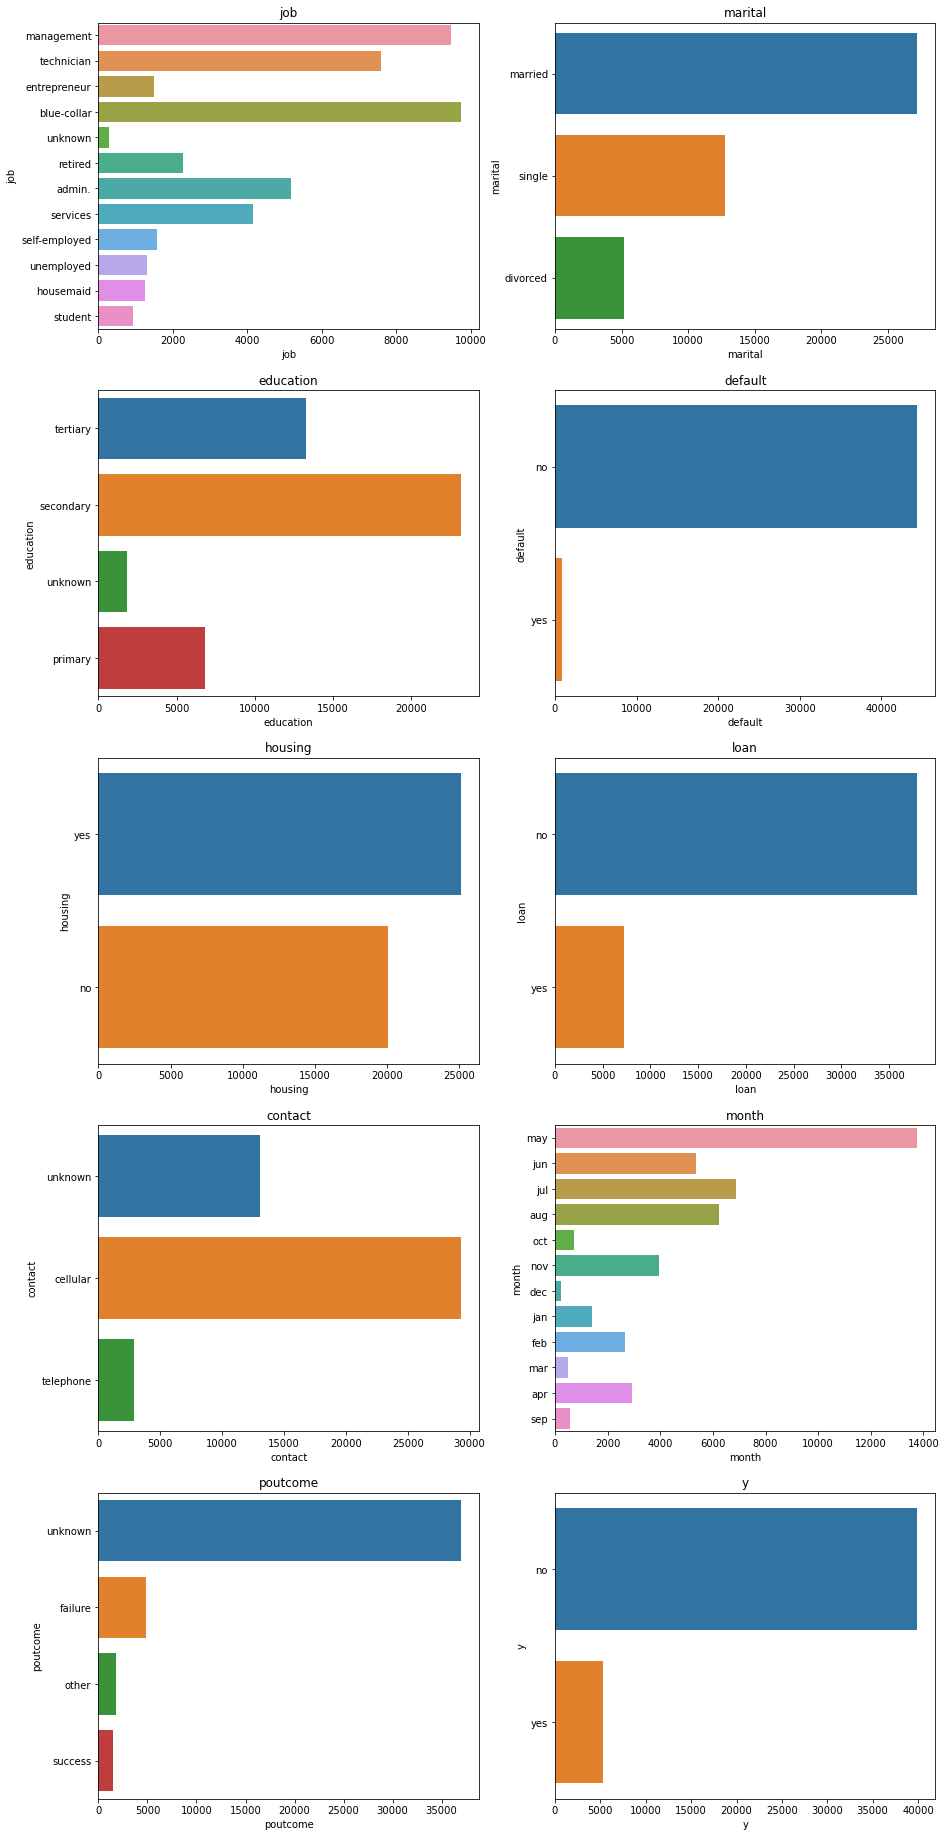

In [15]:
# Verficando a distribuição dos dados categóricos

cat_features=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
              'month', 'poutcome', 'y']

plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(12,2,plotnumber)
    sns.countplot(y=cat_features,data=data)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

### Limpeza do Dataframe

In [16]:
# Vamos excluir as colunas e linhas sem relevância.

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'balance_cat'],
      dtype='object')

In [17]:
# Excluimos então as colunas 'contact' e 'poutcome', por terem pouca relevancia e 
# criamos um novo DataFrame de estudo. 

data_std = data[['age', 
                'job', 
                'marital', 
                'education', 
                'default', 
                'balance', 
                'housing',       
                'loan', 
                'day', 
                'month', 
                'duration', 
                'campaign', 
                'pdays',       
                'previous', 
                'y', 
                'balance_cat']].copy()

### Perfil do Cliente

In [18]:
data_std.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'balance_cat'],
      dtype='object')

<AxesSubplot:title={'center':'Ages'}, ylabel='Values %'>

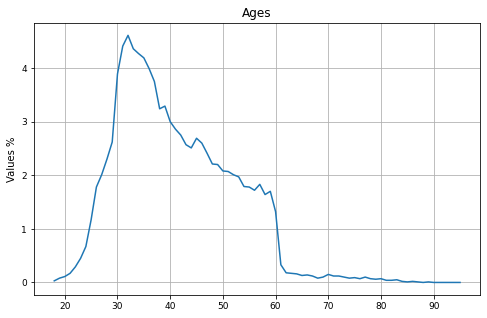

In [19]:
ages = round(data_std['age'].value_counts()/len(data_std)*100,2)

ages.sort_index().plot(kind='line', title='Ages' , ylabel = 'Values %', fontsize=9, figsize = (8,5), grid=True)

In [20]:
jobs = round(data_std['job'].value_counts()/len(data_std)*100,2)

100 - jobs[jobs.index == 'unemployed'][0] + jobs[jobs.index == 'unknown'][0]

97.76

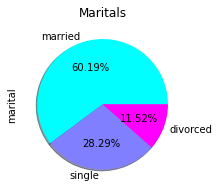

In [21]:
maritals = round(data_std['marital'].value_counts()/len(data_std)*100,2)

maritals.plot(kind='pie', title='Maritals', fontsize=10,
              figsize = (5,3), autopct="%.2f%%", shadow=True, colormap='cool');

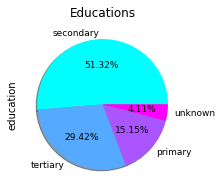

In [22]:
educations = round(data_std['education'].value_counts()/len(data_std)*100,2)

educations.plot(kind='pie', title='Educations', fontsize=9,  
                figsize = (5,3), autopct="%.2f%%", shadow=True, colormap='cool');

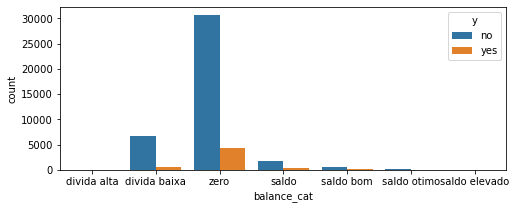

In [23]:
fig, axes = plt.subplots(figsize=(8, 3))
df = data_std['balance_cat'].value_counts()
countplot = sns.countplot(x=data_std['balance_cat'], data=data_std, hue='y')

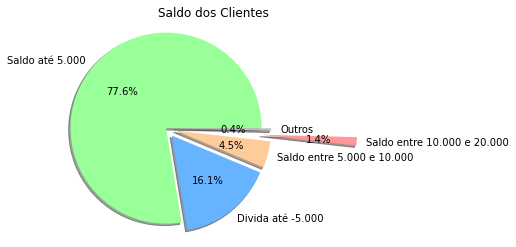

In [24]:
percent = (data_std['balance_cat'].value_counts() / (len(data_std.balance_cat))).round(3)*100

labels = 'Saldo até 5.000', 'Divida até -5.000', 'Saldo entre 5.000 e 10.000', 'Saldo entre 10.000 e 20.000', 'Outros'#, 'saldo elevado', 'divida alta'
sizes = percent[:5]
explode = (0, 0.1, 0.1, 1, 0.1)

colors = ['#99ff99', '#66b3ff', '#ffcc99', '#ff9999', 'silver']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors = colors,
       autopct='%1.1f%%', shadow=True, startangle=0)

plt.title("Saldo dos Clientes") 
ax.axis('equal')

plt.show()

In [25]:
#data_std.groupby('y').marital.value_counts()

### Perfil da Campanha

In [26]:
# Entendendo como a campanha atuou com os clientes. 

In [27]:
data_camp = data_std.iloc[: , 8:14]

In [28]:
data_camp.columns

Index(['day', 'month', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

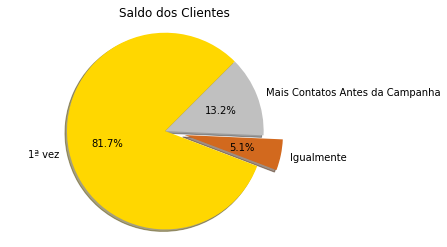

In [29]:
# Criando uma relação entre Campaign e Previous

temp = data_camp.campaign / (data_camp.campaign + data_camp.previous) 
total = (temp.value_counts() / len(data_camp)).round(3)*100

labels = '1ª vez', 'Igualmente', 'Mais Contatos Antes da Campanha'
sizes = [total.iloc[0].round(2),
         total.iloc[1].round(2), 
         (100 - total[total > 5].sum()).round(2) ]
explode = (0, 0.2, 0)

colors = ['gold', 'chocolate', 'silver']

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors = colors,
       autopct='%1.1f%%', shadow=True, startangle=45)

plt.title("Saldo dos Clientes") 
ax.axis('equal')

plt.show()

# Preparando o Dataframe Para os Modelos

In [30]:
#Transformando od dados Categóricos em Dummies
data_std_dummies = pd.get_dummies(data_std.drop('y', axis = 1), drop_first = True)


#Passando os Resultados de 'Yes' ou 'No' para 1 e 0
data_outcome = data_std.y.apply(lambda x: 1 if x == 'yes' else 0)

# Divisão em Treino e Teste

In [31]:
X = data_std_dummies
y = data_outcome

#normalizando os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = SEED)

### Métricas

Sobre as métricas:

    -Acurácia: Mede o quanto o modelo acertou ou seja os verdadeiros positivos e verdadeiros negativos
    
    -Precisão: Calcula quantos verdadeiros positivos foram preditos de forma correta
    
    -Recall: Conhecido como sensibilidade, mede quão bom o modelo está em medir o resultado realmente positivo
    
    -F1 Score: Identificar se algum dos valores de recall ou precisão estão baixos
    
    -Curva ROC e AUC: Quanto maior o número mais bem avaliado será o modelo de classificação

### AUC Score

Quantifica a Curva ROC através da área sob esta curva

Convenção Estatística:

    -área < 0,7: baixa discriminiação
    -0,7 ≤ área < 0,8: discriminação aceitável
    -0,8 ≤ área < 0,9: discriminação excelente
    -área > 0,9: discriminação excepcional

### Testando os Modelos

### Modelo 01: Gradient Boosting Classifier

Acurácia: 0.9
Precisão: 0.626
Recall: 0.375
F1: 0.707
------------------------------------------------------------------------------------------------------------------------


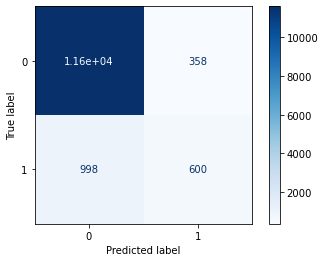

roc_auc: 0.913


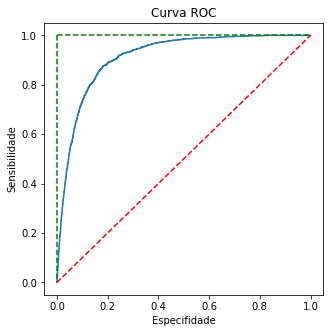

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.63      0.38      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

model1 = GradientBoostingClassifier()

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

cm = plot_confusion_matrix(model1, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model1.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))


### Modelo 02: Logistic Regression

Acurácia: 0.89
Precisão: 0.591
Recall: 0.223
F1: 0.632
------------------------------------------------------------------------------------------------------------------------


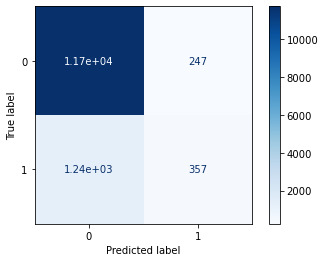

roc_auc: 0.886


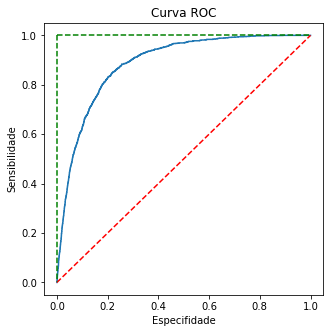

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.59      0.22      0.32      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



In [33]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

cm = plot_confusion_matrix(model2, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model2.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))


### Modelo 03: 	Random Forest Classifier

Acurácia: 0.903
Precisão: 0.656
Recall: 0.364
F1: 0.707
------------------------------------------------------------------------------------------------------------------------


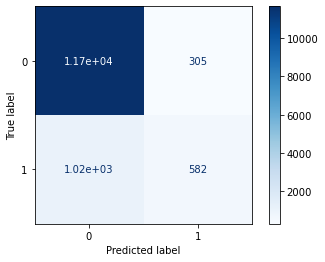

roc_auc: 0.918


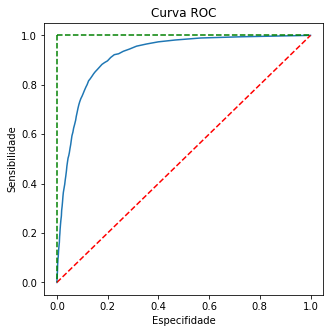

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.66      0.36      0.47      1598

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [34]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()

model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

cm = plot_confusion_matrix(model3, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model3.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))


### Modelo 04: Decision Tree Classifier

Acurácia: 0.865
Precisão: 0.431
Recall: 0.453
F1: 0.683
------------------------------------------------------------------------------------------------------------------------


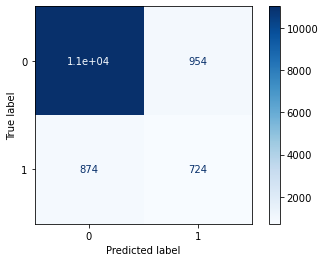

roc_auc: 0.687


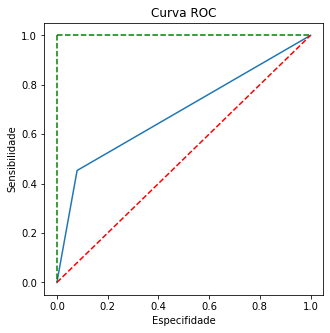

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11966
           1       0.43      0.45      0.44      1598

    accuracy                           0.87     13564
   macro avg       0.68      0.69      0.68     13564
weighted avg       0.87      0.87      0.87     13564



In [35]:
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier()

model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))
print('--'*60)

cm = plot_confusion_matrix(model4, X_test, y_test, cmap='Blues', values_format = '.3g')
plt.show()
    
prob_previsao = model4.predict_proba(X_test)[:,1] #probabilidade do evento ser predito como 0 ou 1 - uma matriz com 2 colunas

    #tfp = taxa falsos positivos
    #tvp = taxa verdadeiros positivos

tfp, tvp, limite = roc_curve(y_test, prob_previsao)
print('roc_auc: {:.3}'.format(roc_auc_score(y_test, prob_previsao)))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

print(classification_report(y_test, y_pred))


### Modelo 03: 	Random Forest Classifier_ v2

Feature: 0, Score: 0.10635
Feature: 1, Score: 0.10409
Feature: 2, Score: 0.09319
Feature: 3, Score: 0.27755
Feature: 4, Score: 0.04139
Feature: 5, Score: 0.05732
Feature: 6, Score: 0.03031
Feature: 7, Score: 0.00929
Feature: 8, Score: 0.00367
Feature: 9, Score: 0.00345
Feature: 10, Score: 0.01136
Feature: 11, Score: 0.00565
Feature: 12, Score: 0.00514
Feature: 13, Score: 0.00724
Feature: 14, Score: 0.00480
Feature: 15, Score: 0.01198
Feature: 16, Score: 0.00525
Feature: 17, Score: 0.00169
Feature: 18, Score: 0.01168
Feature: 19, Score: 0.00996
Feature: 20, Score: 0.01364
Feature: 21, Score: 0.01215
Feature: 22, Score: 0.00610
Feature: 23, Score: 0.00196
Feature: 24, Score: 0.02609
Feature: 25, Score: 0.01047
Feature: 26, Score: 0.01213
Feature: 27, Score: 0.00484
Feature: 28, Score: 0.00853
Feature: 29, Score: 0.00587
Feature: 30, Score: 0.00975
Feature: 31, Score: 0.00937
Feature: 32, Score: 0.01374
Feature: 33, Score: 0.01112
Feature: 34, Score: 0.00898
Feature: 35, Score: 0.01264
Fe

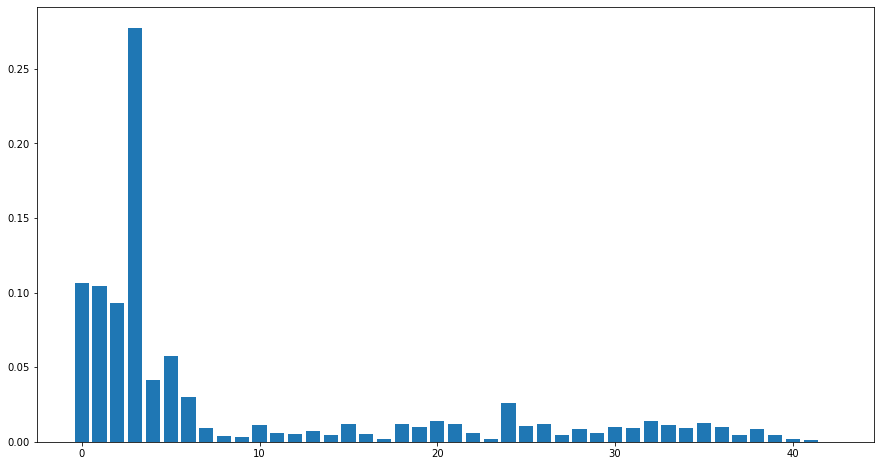

In [40]:
#importancia das features
importancia = model3.feature_importances_
#resumo da importância
for i,v in enumerate(importancia):
    print('Feature: %0d, Score: %.5f' % (i,v))
#plotagem dos dados
ax = plt.figure(figsize=(15,8))
ax = plt.bar([x for x in range(len(importancia))], importancia)
plt.show();


In [53]:
data_std_dummies = pd.DataFrame(data_std_dummies)
data_std_dummies.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'balance_cat_divida baixa',
       'balance_cat_zero', 'balance_cat_saldo', 'balance_cat_saldo bom',
       'balance_cat_saldo otimo', 'balance_cat_saldo elevado'],
      dtype='object')

In [66]:
#mais de 10 minutos de ligação
duracao_10_min =  data[data['duration'] > 600].y.value_counts()
duracao_10_min

no     1957
yes    1833
Name: y, dtype: int64

In [68]:
duracao_menos_10_min = data[data['duration'] <= 600].y.value_counts()
duracao_menos_10_min

no     37965
yes     3456
Name: y, dtype: int64

In [44]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

#cv_results = cross_validate(model3, X, y, cv=5)

#sorted(cv_results.keys())
#['fit_time', 'score_time', 'test_score']
#cv_results['test_score']


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model3, X, y, cv=cv)






array([0.89781775, 0.8991448 , 0.90371572, 0.89818638, 0.89818638])